## Ejercicio manejo de datos y Limpieza

 - Importa los datos de FIFA.csv, Contienen información de jugadores de futbol
 - Realiza una limpieza de datos:
   - ¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?
   - Cambia las medidas de las variables Weight y Height a Kg y cm
   - Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
   - Arregla también las variables W/F, SM, IR
   - Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.
   - También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...
 - Tratamiento de valores nulos:
   - Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas
   - Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...
 - Valores extremos
   - Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos
   - Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.
 - Análisis descriptivo
   - Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
   - Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente.
   - OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_fifa = pd.read_csv("fifa.csv")
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [4]:
df_fifa.describe()

,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13656.000000,...,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,8561.641971,219378.929708,25.286058,5.509927,258.313431,51.585766,47.996934,53.460292,60.427956,44.986965,...,15.830292,1630.103942,361.317007,68.108832,55.056423,58.931679,64.236277,50.123577,64.860219,66.945912
std,4954.144383,37445.343736,4.944498,5.797176,72.412379,17.899930,19.411530,17.010578,13.975634,17.760924,...,17.276491,260.986045,40.258414,11.183342,13.839958,10.159851,9.816203,16.815110,9.736964,6.860189
min,1.000000,16.000000,16.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,...,1.000000,731.000000,228.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,38.000000
25%,4269.750000,203979.750000,21.000000,0.000000,231.000000,41.000000,33.000000,45.000000,56.000000,32.000000,...,8.000000,1491.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,62.000000
50%,8555.500000,228927.000000,25.000000,4.000000,271.000000,56.000000,52.000000,56.000000,63.000000,47.000000,...,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,67.000000
75%,12887.250000,244043.500000,29.000000,9.000000,306.000000,65.000000,64.000000,65.000000,69.000000,59.000000,...,14.000000,1811.250000,389.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,72.000000
max,17122.000000,259091.000000,47.000000,26.000000,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,...,90.000000,2304.000000,498.000000,96.000000,93.000000,93.000000,95.000000,90.000000,93.000000,93.000000


In [5]:

df_fifa["Weight"]
def lbs_to_kgs(weight_info):
    return weight_info.str.replace("lbs", "").astype(float) * 0.453592


df_fifa["Weight_kg"] = lbs_to_kgs(df_fifa["Weight"]).round(2)

df_fifa[["Weight", "Weight_kg"]]

,Weight,Weight_kg
0,161lbs,73.03
1,159lbs,72.12
2,134lbs,60.78
3,152lbs,68.95
4,150lbs,68.04
...,...,...
13695,143lbs,64.86
13696,176lbs,79.83
13697,146lbs,66.22
13698,176lbs,79.83


In [6]:
df_fifa.Height

0         5'9"
1         6'0"
2         5'4"
3        5'10"
4        5'11"
         ...  
13695     5'8"
13696     6'5"
13697     5'7"
13698    5'11"
13699    5'10"
Name: Height, Length: 13700, dtype: object

In [7]:
def height_imperial_to_metric(s):
    s = s.replace('"', '')
    feet, inches = s.split("'")
    feet = int(feet)
    inches = int(inches)
    meters = (feet * 0.3048) + (inches * 0.0254)
    return meters

df_fifa["Height Meters"] = df_fifa["Height"].apply(height_imperial_to_metric)
print(df_fifa[['Height', 'Height Meters']])

      Height  Height Meters
0       5'9"         1.7526
1       6'0"         1.8288
2       5'4"         1.6256
3      5'10"         1.7780
4      5'11"         1.8034
...      ...            ...
13695   5'8"         1.7272
13696   6'5"         1.9558
13697   5'7"         1.7018
13698  5'11"         1.8034
13699  5'10"         1.7780

[13700 rows x 2 columns]


In [8]:
columns_to_convert = ["LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB", "GK"]
df_fifa[columns_to_convert].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,...,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,...,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,...,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,...,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,...,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2


In [9]:

def clean_plus(s):
    s = re.split(r'\+', s)[0]
    return int(s.strip())

for col in columns_to_convert:
    df_fifa[col + '_clean'] = df_fifa[col].map(clean_plus)

df_fifa.head()


,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,LDM_clean,CDM_clean,RDM_clean,RWB_clean,LB_clean,LCB_clean,CB_clean,RCB_clean,RB_clean,GK_clean
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59,59,59,59,58,54,54,54,58,15
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53,53,53,57,53,48,48,48,53,18
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56,56,56,59,53,41,41,41,53,12
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58,58,58,56,57,58,58,58,57,14
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64,64,64,64,63,61,61,61,63,15


In [10]:
df_fifa.columns[3:]

Index(['Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Growth',
       ...
       'LDM_clean', 'CDM_clean', 'RDM_clean', 'RWB_clean', 'LB_clean',
       'LCB_clean', 'CB_clean', 'RCB_clean', 'RB_clean', 'GK_clean'],
      dtype='object', length=128)

In [11]:
df_fifa[["W/F", "SM", "A/W", "D/W", "IR", "Value", "Wage"]]

,W/F,SM,A/W,D/W,IR,Value,Wage
0,4 ★,2★,High,Medium,1 ★,€525K,€4K
1,3 ★,4★,High,Low,2 ★,€8.5M,€23K
2,4 ★,4★,High,Medium,2 ★,€9M,€49K
3,2 ★,2★,Medium,Medium,1 ★,€275K,€4K
4,2 ★,3★,Low,Medium,1 ★,€725K,€2K
...,...,...,...,...,...,...,...
13695,3 ★,2★,High,Medium,1 ★,€325K,€1K
13696,2 ★,1★,Medium,Medium,1 ★,€190K,€700
13697,4 ★,4★,High,Medium,2 ★,€8M,€9K
13698,3 ★,2★,Medium,Medium,1 ★,€140K,€4K


In [12]:
df_fifa[["W/F", "SM"]]

,W/F,SM
0,4 ★,2★
1,3 ★,4★
2,4 ★,4★
3,2 ★,2★
4,2 ★,3★
...,...,...
13695,3 ★,2★
13696,2 ★,1★
13697,4 ★,4★
13698,3 ★,2★


In [13]:
df_fifa["SM_clean"] = df_fifa["SM"].str.replace(r"\D", "", regex=True)
df_fifa["W/F_clean"] = df_fifa["W/F"].str.replace(r"\D", "", regex=True)
df_fifa[["W/F", "W/F_clean", "SM", "SM_clean"]]

,W/F,W/F_clean,SM,SM_clean
0,4 ★,4,2★,2
1,3 ★,3,4★,4
2,4 ★,4,4★,4
3,2 ★,2,2★,2
4,2 ★,2,3★,3
...,...,...,...,...
13695,3 ★,3,2★,2
13696,2 ★,2,1★,1
13697,4 ★,4,4★,4
13698,3 ★,3,2★,2


In [14]:
def player_positions(position):
    goalkeepers = ["GK"]
    defenders = ["CB", "LB", "RB", "LCB", "RCB", "LWB", "RWB"]
    midfielders = ["CDM", "CM", "CAM", "LDM", "RDM", "LCM", "RCM", "LM", "RM", "LAM", "RAM"]
    forwards = ["ST", "CF", "LW", "RW", "LF", "RF", "LS", "RS"]
    
    if position in goalkeepers:
        return "Goalkeeper"
    elif position in defenders:
        return "Defender"
    elif position in midfielders:
        return "Midfielder"
    elif position in forwards:
        return "Forward"
    else:
        return "Other"

df_fifa["Position_Group"] = df_fifa["BP"].apply(player_positions)

print(df_fifa["Position_Group"])


0        Midfielder
1           Forward
2        Midfielder
3        Midfielder
4        Midfielder
            ...    
13695      Defender
13696    Goalkeeper
13697    Midfielder
13698    Midfielder
13699    Midfielder
Name: Position_Group, Length: 13700, dtype: object


In [15]:
def clean_money_values(value):
    if pd.isna(value):
        return None
    
    # removes the EUR symbol
    value = value.replace('€', '')
    
    if 'M' in value: #millions convertion
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value: #thousands
        return float(value.replace('K', '')) * 1000
    else:
        try:
            return float(value)
        except:
            return None
        
df_fifa["Value_EUR"] = df_fifa["Value"].apply(clean_money_values)
df_fifa["Wage_EUR"] = df_fifa["Wage"].apply(clean_money_values)
df_fifa[["Wage_EUR", "Value_EUR"]]

,Wage_EUR,Value_EUR
0,4000.0,525000.0
1,23000.0,8500000.0
2,49000.0,9000000.0
3,4000.0,275000.0
4,2000.0,725000.0
...,...,...
13695,1000.0,325000.0
13696,700.0,190000.0
13697,9000.0,8000000.0
13698,4000.0,140000.0


In [16]:
pos_stats = df_fifa.groupby("Position_Group").agg({
    'Value_EUR': ['mean', 'sum', 'count'],
    'Wage_EUR': ['mean', 'sum'],
    'Age': 'mean',
    'OVA': 'mean',
    'Height Meters': 'mean',
    'Weight_kg': 'mean'
}).round(2)

print(pos_stats)

                 Value_EUR                      Wage_EUR                Age  \
                      mean           sum count      mean         sum   mean   
Position_Group                                                                
Defender        2263156.64  9.969205e+09  4405  10341.85  45555850.0  25.46   
Forward         2617962.34  6.950690e+09  2655  11297.95  29996050.0  25.47   
Goalkeeper      2326655.74  2.980446e+09  1281   8585.44  10997950.0  26.57   
Midfielder      2804454.75  1.502907e+10  5359  10544.64  56508750.0  24.74   

                  OVA Height Meters Weight_kg  
                 mean          mean      mean  
Position_Group                                 
Defender        67.01          1.83     76.59  
Forward         66.72          1.82     76.17  
Goalkeeper      66.63          1.89     82.19  
Midfielder      67.08          1.78     71.74  


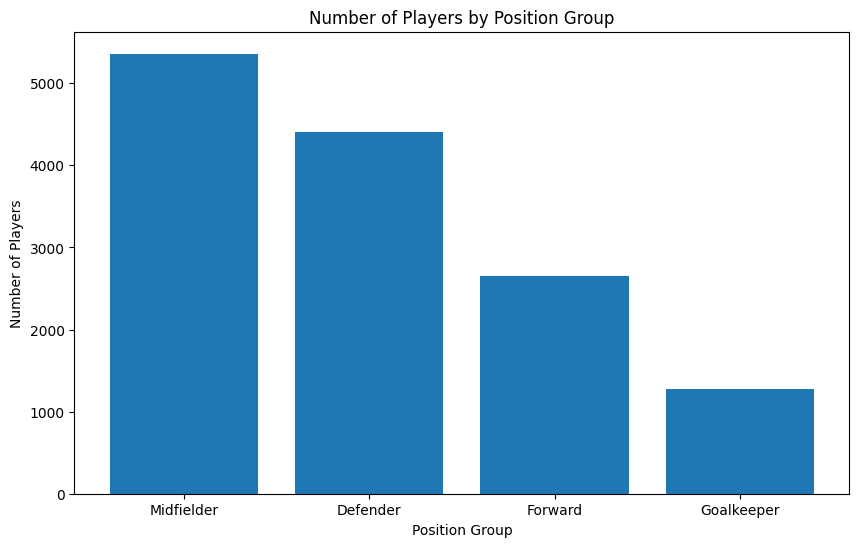

In [17]:
plt.figure(figsize=(10, 6))
position_counts = df_fifa['Position_Group'].value_counts()
plt.bar(position_counts.index, position_counts.values)
plt.title('Number of Players by Position Group')
plt.ylabel('Number of Players')
plt.xlabel('Position Group')
plt.show()

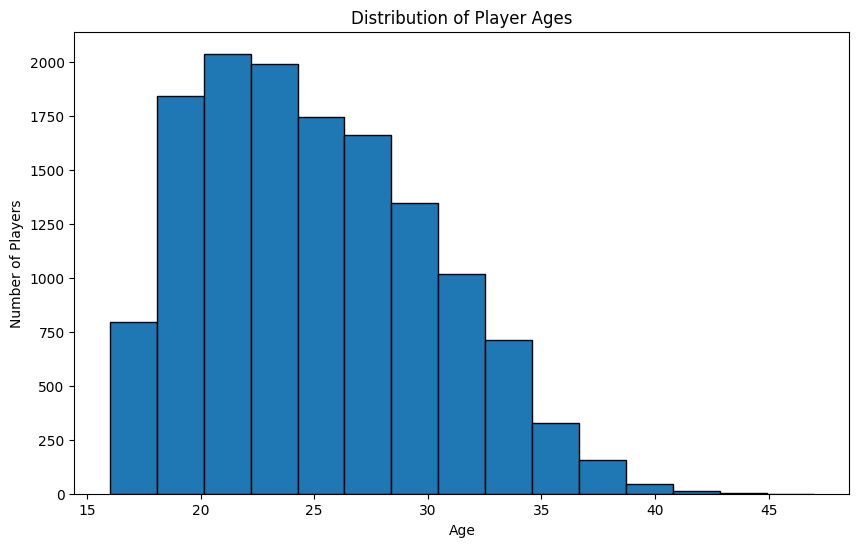

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df_fifa['Age'], bins=15, edgecolor='black')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()
# player ages

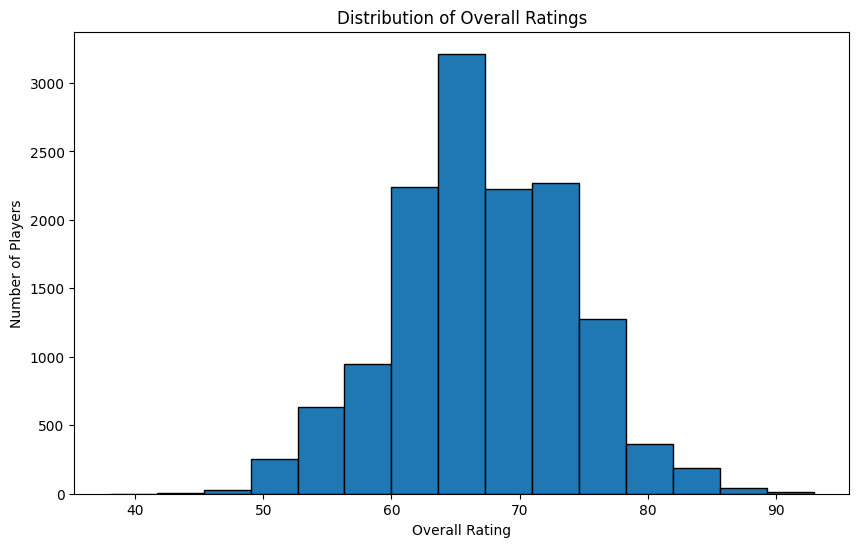

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df_fifa['OVA'], bins=15, edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.show()

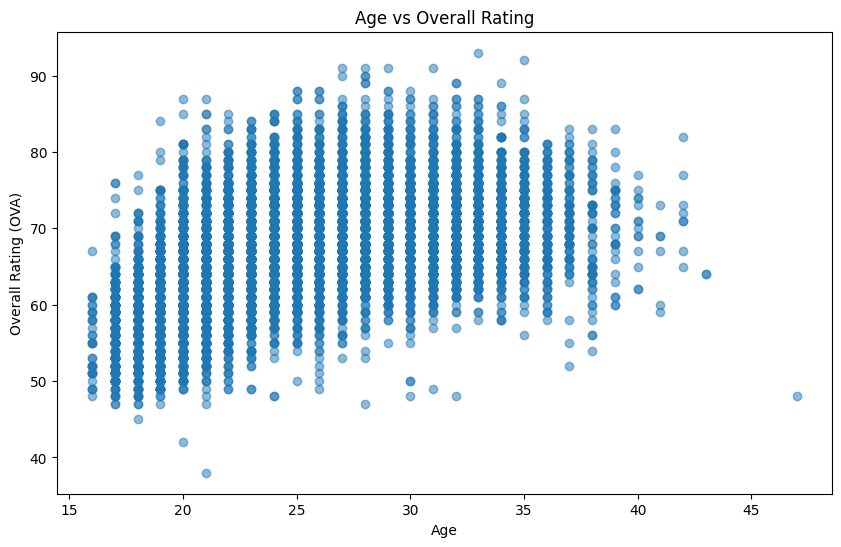

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df_fifa['Age'], df_fifa['OVA'], alpha=0.5)
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating (OVA)')
plt.show()

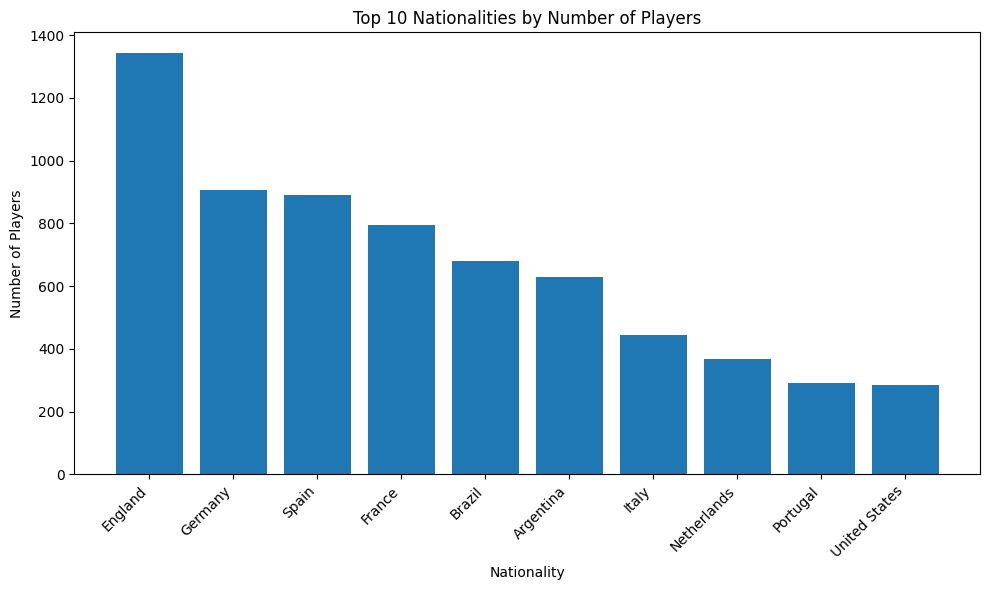

In [20]:
nationality_counts = df_fifa['Nationality'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(nationality_counts.index, nationality_counts.values)
plt.title('Top 10 Nationalities by Number of Players')
plt.ylabel('Number of Players')
plt.xlabel('Nationality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

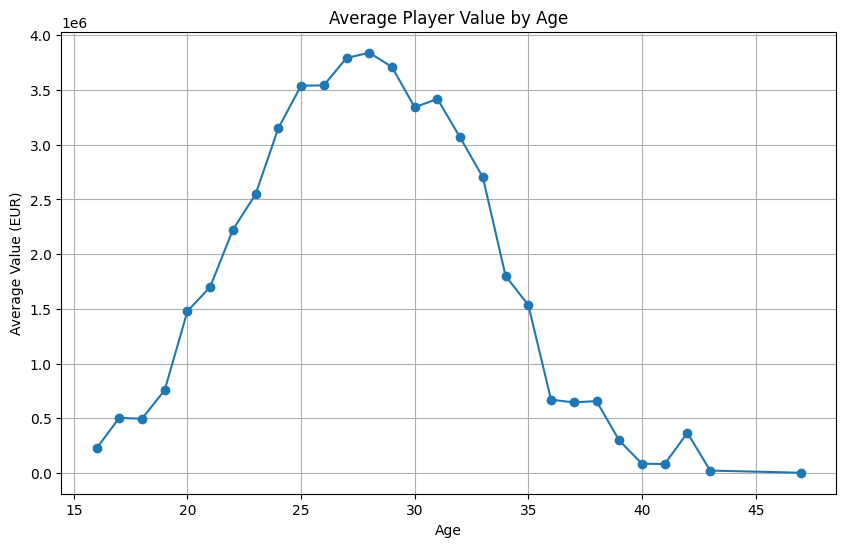

In [22]:
avg_value_by_age = df_fifa.groupby('Age')['Value_EUR'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_value_by_age.index, avg_value_by_age.values, marker='o', linestyle='-')
plt.title('Average Player Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Value (EUR)')
plt.grid(True)
plt.show()

/var/folders/ck/xskg9s8n73qbpf18vrdlfxf00000gn/T/ipykernel_68771/3554602938.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_fifa[df_fifa['Position_Group'] == pos]['OVA'] for pos in df_fifa['Position_Group'].unique()],


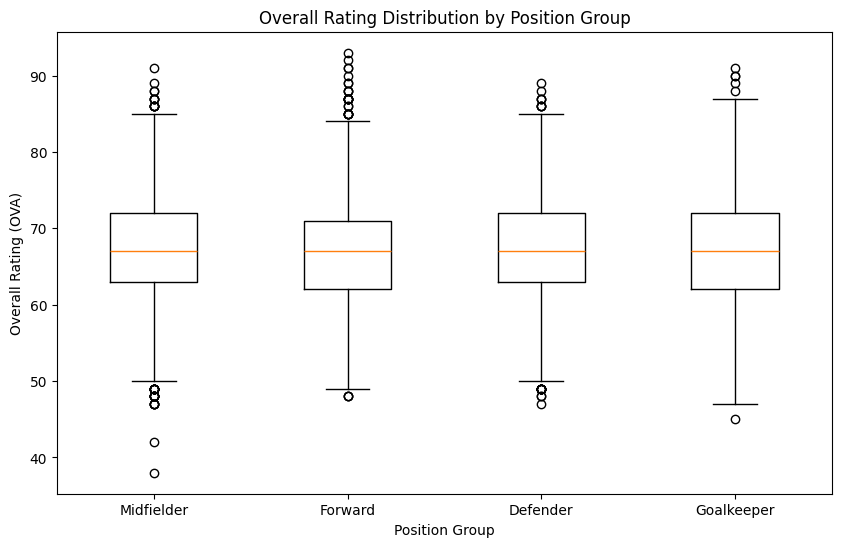

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_fifa[df_fifa['Position_Group'] == pos]['OVA'] for pos in df_fifa['Position_Group'].unique()], 
            labels=df_fifa['Position_Group'].unique())
plt.title('Overall Rating Distribution by Position Group')
plt.ylabel('Overall Rating (OVA)')
plt.xlabel('Position Group')
plt.show()